In [3]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.6.0+cpu
False


In [4]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def f(x):
    print("f(x) called with x =", x)
    return 3*x**2 + 2*x + 1

In [13]:
f(3.0)

f(x) called with x = 3.0


34.0

f(x) called with x = [-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


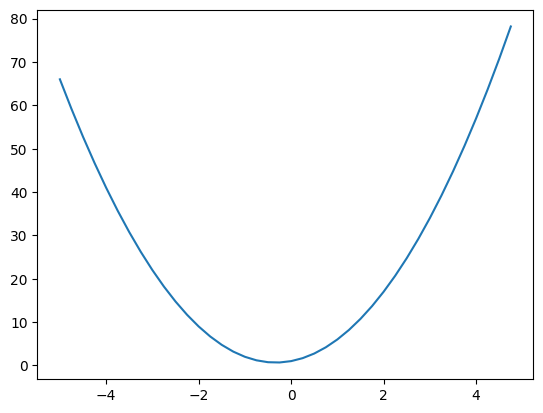

In [14]:
xs= np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [24]:
h = 0.000000001
x= -0.5
(f(x+h)-f(x))/h  # numerical derivative at x=-3.0

f(x) called with x = -0.499999999
f(x) called with x = -0.5


-0.9999999717180684

In [25]:
a = 3.0
b = 2.0
c = 1.0
d = a*b + c
print("d =", d)

d = 7.0


In [26]:
h=0.000000001
a = 3.0
b = 2.0
c = 1.0

d1 = a*b + c

a+=h
d2 = a*b + c

print("d1 =", d1)
print("d2 =", d2)
print("d2 - d1 =", d2 - d1)
print("d2 - d1 / h =", (d2 - d1) / h)

d1 = 7.0
d2 = 7.000000002
d2 - d1 = 2.000000165480742e-09
d2 - d1 / h = 2.000000165480742


In [27]:
h=0.000000001
a = 3.0
b = 2.0
c = 1.0

d1 = a*b + c

b+=h
d2 = a*b + c

print("d1 =", d1)
print("d2 =", d2)
print("d2 - d1 =", d2 - d1)
print("d2 - d1 / h =", (d2 - d1) / h)

d1 = 7.0
d2 = 7.000000003
d2 - d1 = 3.000000248221113e-09
d2 - d1 / h = 3.000000248221113


In [ ]:
h=0.000000001
a = 3.0
b = 2.0
c = 1.0

d1 = a*b + c

c+=h # derivative with respect to c
d2 = a*b + c

print("d1 =", d1)
print("d2 =", d2)
print("d2 - d1 =", d2 - d1)
print("d2 - d1 / h =", (d2 - d1) / h)


d1 = 7.0
d2 = 7.000000001
d2 - d1 = 1.000000082740371e-09
d2 - d1 / h = 1.000000082740371


In [ ]:
class Value:
    def __init__(self,data,_children=(),_op='',label = ''):
        self.data = data
        self._prev = set(_children)  # previous nodes in the computation graph
        self._op = _op # operation that produced this value
        self.label = label
        self.grad = 0.0  # gradient, not used in this example but can be useful for backpropagation
    def __repr__(self):
        return f"Value({self.data})"
    def __add__(self, other):
        return Value(self.data + other.data, (self, other),'+') # the children of d are self a and other which is b
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other),'*') # 
    

a= Value(3.0, label='a') # create a Value object for a
b= Value(2.0, label='b') # create a Value object for b
c= Value(1.0, label='c') # create a Value object for c

# d= a+b # a.__add__(b) should be called
# a*b # a.__mul__(b) should be called
# d=a*b +c # (a.__mul__(b)).__add__(c) should be called
# type(d),d._prev,d._op


e= a * b  # this will call the __add__ and __mul__ methods of the Value class
e.label = 'e'  # label the result
d = e + c  # this will call the __add__ method of the Value class
d.label = 'd'  # label the result
f=Value(0.2,  label = 'f')
L=  d * f
L.label = 'L'  # label the loss  
# print("d =", d)
print("L =", L)


L = Value(1.4000000000000001)


In [40]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

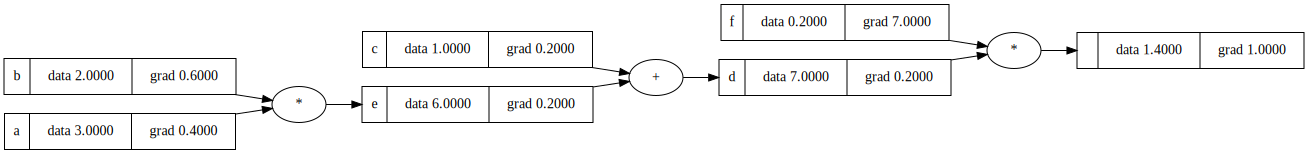

In [77]:
draw_dot(L)

In [50]:
L= d*f
# dl/dd=?
dl_dd = f.data  # derivative of L with respect to d
print("dl/dd =", dl_dd)
h=0.000000001
# derivate of L with respect to d 
d1 = d.data * f.data  # L = d*f
d.data += h
d2 = d.data * f.data  # L = d*f
print("d1 =", d1)
print("d2 =", d2)
print("d2 - d1 =", d2 - d1)
print("d2 - d1 / h =", (d2 - d1) / h)



dl_df = d.data  # derivative of L with respect to f
print("dl/df =", dl_df)

dl/dd = 0.2
d1 = 1.4000000004000002
d2 = 1.4000000006000002
d2 - d1 = 2.000000165480742e-10
d2 - d1 / h = 0.2000000165480742
dl/df = 7.000000003


In [60]:
# dL / dc
# d= e + c
#  
dd_dc = 1.0
print("dd/dc =", dd_dc)
dl_dc = d.grad * dd_dc  # derivative of L with respect to c dl_dc = dl/dd * dd/dc
print("dl/dc =", dl_dc)

dd/dc = 1.0
dl/dc = 0.2


In [73]:
# dl_da 
# dl_da = dl_de*de_da
# e = a * b
dl_de = e.grad
de_da = b.data  # derivative of e with respect to a
dl_da = dl_de * de_da  # derivative of L with respect to a
print("dl/da =", dl_da)


# dl_db
de_db = a.data  # derivative of e with respect to b
dl_db = dl_de * de_db  # derivative of L with respect to b
print("dl/db =", dl_db)

dl/da = 0.4
dl/db = 0.6000000000000001


In [76]:
L.grad = 1.0  # set the gradient of the loss to 1.0
f.grad = L.grad * dl_df  # backpropagate the gradient to f  
d.grad = L.grad * dl_dd  # backpropagate the gradient to d
c.grad = dl_dc  # backpropagate the gradient to c
e.grad = dl_dc # by symmetry, e.grad = d.grad
a.grad =dl_da  # backpropagate the gradient to a
b.grad = dl_db  # by symmetry, b.grad = e.grad




dd/dc = 1.0
dl/dc = 0.2


In [78]:
def lol():
    h = 0.000000001
    
    
    a= Value(3.0, label='a') # create a Value object for a
    b= Value(2.0, label='b') # create a Value object for b
    c= Value(1.0, label='c') # create a Value object for c
    e= a * b  # this will call the __add__ and __mul__ methods of the Value class
    d = e + c  # this will call the __add__ method of the Value class
    f=Value(0.2,  label = 'f')
    L=  d * f
    L.label = 'L'  # label the loss
    L1 = L.data



    # a= Value(3.0+h, label='a') # create a Value object for a
    a= Value(3.0, label='a') # create a Value object for a
    b= Value(2.0+h, label='b') # create a Value object for b
    c= Value(1.0, label='c') # create a Value object for c
    # c.data += h  # simulate the change in c
    e= a * b  # this will call the __add__ and __mul__ methods of the Value class
    # e.data += h  # simulate the change in e
    d = e + c  # this will call the __add__ method of the Value class
    # d.data += h  # simulate the change in a
    f=Value(0.2,  label = 'f')
    L=  d * f
    L.label = 'L'  # label the loss
    L2 = L.data
    # L2 = L.data + h # we add h to the loss to simulate the change in a
    print("L1 =", L1)
    print("L2 =", L2)
    # print("L2 - L1 =", L2 - L1) # this should be the derivative of L with respect to a


    # print("L2 - L1 / h =", (L2 - L1) / h) # this should be the derivative of L with respect to a
    print("L2 - L1 / h =", (L2 - L1) / h) # this should be the derivative of L with respect to L will be 

lol()



L1 = 1.4000000000000001
L2 = 1.4000000006000002
L2 - L1 / h = 0.6000000496442226


In [80]:
import numpy as np

In [81]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# o = n.tanh(); o.label = 'o'""